In [103]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('seaborn')

In [104]:
test = pd.read_csv('../data/test.csv', index_col=0, parse_dates=['time'], dayfirst=True)
test.head()

,time,price
4651,2021-08-27 04:15:00,148.36
4652,2021-08-27 04:30:00,148.28
4653,2021-08-27 04:45:00,148.05
4654,2021-08-27 05:00:00,148.04
4655,2021-08-27 05:15:00,148.28


In [105]:
pred = pd.read_csv('../data/pred.csv', index_col=0, parse_dates=['time'], dayfirst=True)
pred.head()

,time,prediction
0,2021-08-27 04:15:00,148.024020
1,2021-08-27 04:30:00,147.996457
2,2021-08-27 04:45:00,148.010470
3,2021-08-27 05:00:00,147.807078
4,2021-08-27 05:15:00,147.789013


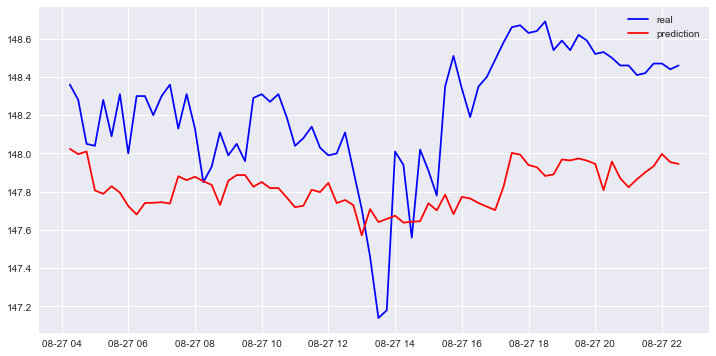

In [106]:
fig, ax = plt.subplots(figsize=(12, 6))
147.572439
ax.plot(test['time'], test['price'], c='b', label='real')
ax.plot(test['time'], pred['prediction'], c='r', label='prediction')
plt.legend()
plt.show()

In [107]:
def calculate_income(series:pd.Series):
    prices = series.iloc[:, 1]
    entry_point = series[prices == prices.min()]
    sell_region = series[series.index > entry_point.index[0]]
    prices = sell_region.iloc[:, 1]
    exit_point = sell_region[prices == prices.max()]
    income = round(exit_point.values[0][1] - entry_point.values[0][1], 2)
    return income

def pmm_info(predicted:pd.Series, real:pd.Series):
    # Supposed income calculation
    supposed_income = calculate_income(predicted)

    # Real income calculation
    real_income = calculate_income(real)

    diff = real_income - supposed_income

    if diff > 0:
        trend = 'positive'
    elif diff < 0:
        trend = 'negative'
    else:
        trend = 'exact'

    return {'supposed income': supposed_income,
            'real_income': real_income,
            'diff': abs(diff),
            'trend': trend}
pmm_info(pred, test)

{'supposed income': 0.43,
 'real_income': 1.55,
 'diff': 1.12,
 'trend': 'positive'}